In [1]:
pip install matplotlib pandas tensorflow=="2.13.*" tensorflow-io=="0.34.*" tensorflow-hub

Note: you may need to restart the kernel to use updated packages.


In [9]:
!pip freeze

absl-py==2.0.0
anyio==4.0.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
beautifulsoup4==4.12.2
bleach==6.1.0
cachetools==5.3.2
certifi==2023.7.22
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.0
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
executing==2.0.1
fastjsonschema==2.19.0
flatbuffers==23.5.26
fonttools==4.44.1
fqdn==1.5.1
gast==0.4.0
google-auth==2.23.4
google-auth-oauthlib==1.0.0
google-pasta==0.2.0
grpcio==1.59.2
h5py==3.10.0
idna==3.4
ipykernel==6.26.0
ipython==8.17.2
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.2
jsonschema-specifications==2023.11.1
jupyter-events==0.9.0
jupyter-lsp==2.2.0
jupyter_client==8.6.0
jupyter_core==5.5.0
jupyter_server==2.10.0
jupyter_server_terminals==0.4.4
jupyterlab==4.0.8
jupyterlab-pygments==0.2.2
jupyterlab_server==2.25.1
keras==2.13.1
kiwisol

In [2]:
import os

from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_io as tfio

2023-11-16 08:47:30.508519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
yamnet_model_handle = "https://tfhub.dev/google/yamnet/1"
yamnet_model = hub.load(yamnet_model_handle)

In [4]:
# Utility functions for loading audio files and making sure the sample rate is correct.
@tf.function
def load_wav_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    file_contents = tf.io.read_file(filename)
    wav, sample_rate = tf.audio.decode_wav(
        file_contents,
        desired_channels=1
    )
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

2023-11-16 08:47:37.413877: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: AVX AVX2 FMA


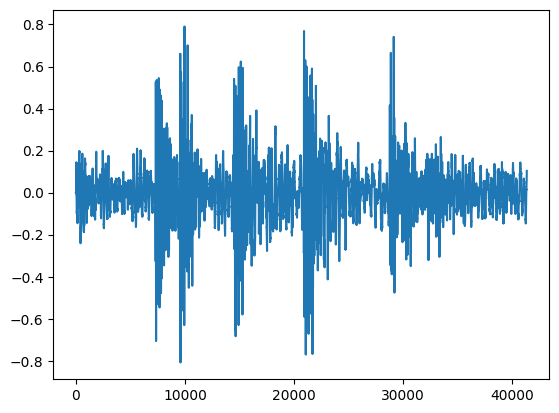

In [5]:
testing_wav_data = load_wav_16k_mono("./test_data/high_heels_001.wav")

_ = plt.plot(testing_wav_data)

# Play the audio file.
display.Audio(testing_wav_data, rate=16000)

In [6]:
class_map_path = yamnet_model.class_map_path().numpy().decode("utf-8")
class_names = list(pd.read_csv(class_map_path)["display_name"])
print(class_names[:20])

['Speech', 'Child speech, kid speaking', 'Conversation', 'Narration, monologue', 'Babbling', 'Speech synthesizer', 'Shout', 'Bellow', 'Whoop', 'Yell', 'Children shouting', 'Screaming', 'Whispering', 'Laughter', 'Baby laughter', 'Giggle', 'Snicker', 'Belly laugh', 'Chuckle, chortle', 'Crying, sobbing']


In [7]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.math.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

The main sound is: Clip-clop
The embeddings shape: (5, 1024)


In [8]:
scores, embeddings, spectrogram = yamnet_model(testing_wav_data2)
class_scores = tf.reduce_mean(scores, axis=0)
top_class = tf.math.argmax(class_scores)
inferred_class = class_names[top_class]

print(f'The main sound is: {inferred_class}')
print(f'The embeddings shape: {embeddings.shape}')

NameError: name 'testing_wav_data2' is not defined